In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Import Data

In [2]:
white = pd.read_csv("data/winequality-white.csv",delimiter = ';', header = 0, )
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
red = pd.read_csv("data/winequality-red.csv", delimiter = ';', header = 0)
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red['type'] = 'red'

In [5]:
white['type'] = 'white'

In [6]:
wines = pd.concat([red,white])

In [7]:
red.shape, white.shape, wines.shape

((1599, 13), (4898, 13), (6497, 13))

In [8]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

## Visualisations

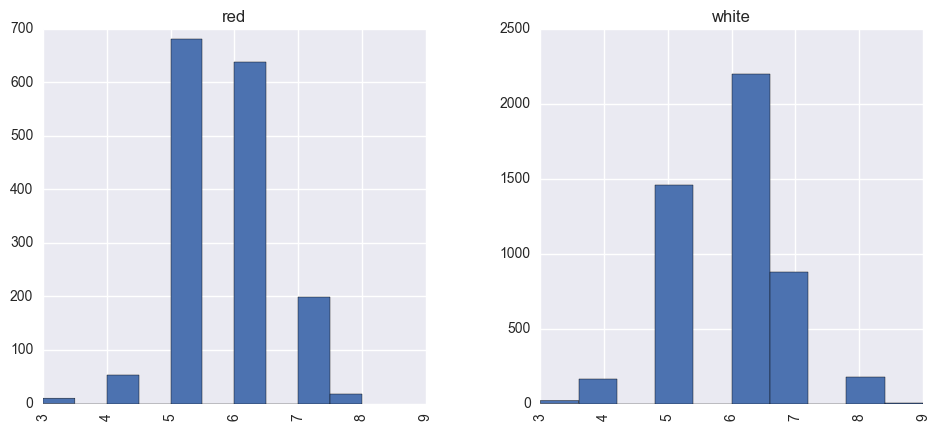

In [9]:
wines.hist(column = 'quality', by='type', figsize=(11,5), sharex=True)
plt.show()

In [10]:
wines.groupby('type')['quality'].median()

type
red      6
white    6
Name: quality, dtype: int64

No major difference in quality between red and white. Therefore don't need to worry about these if doing stratified splitting of training and test set, and should drop this actually.

In [11]:
wines.drop('type', axis =1, inplace = True)

In [12]:
corr_matrix = wines.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


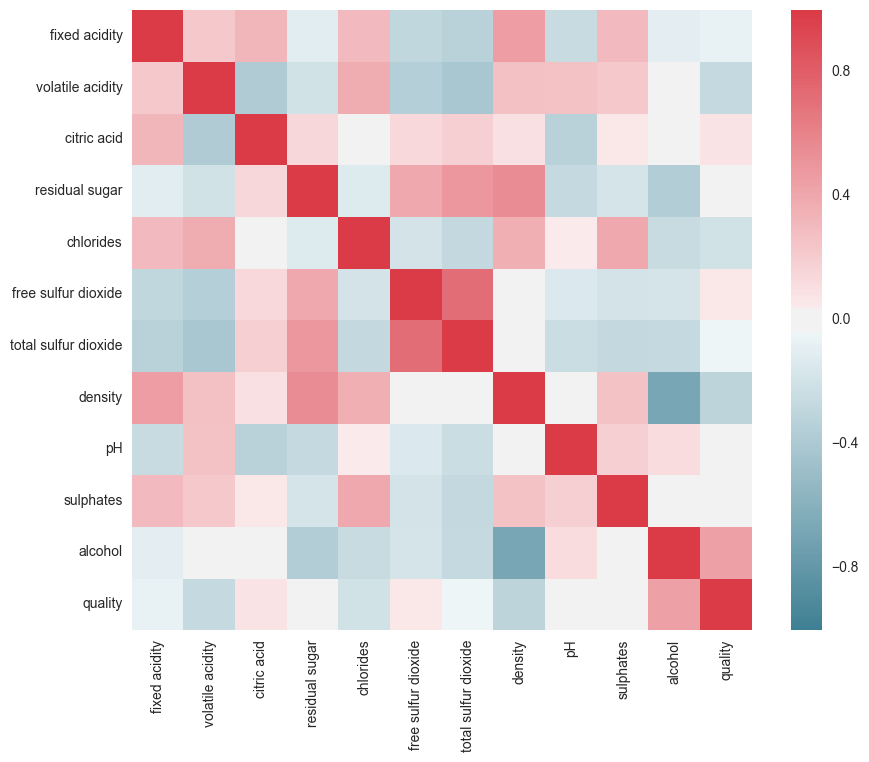

In [13]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [14]:
abs(corr_matrix['quality']).sort_values(ascending = False) 

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

In [15]:
y = wines.quality
X = wines.drop('quality', axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [17]:
pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [18]:
prep_X_train = pipeline.fit_transform(X_train)

In [19]:
prep_X_test = pipeline.fit_transform(X_test)

### Decision Tree

In [20]:
dt = DecisionTreeClassifier()

In [21]:
dt.fit(prep_X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [22]:
dt_cv_error = cross_val_score(dt, X_train, y_train, cv = 3, scoring = 'neg_mean_squared_error')
dt_cv_error

array([-0.82074928, -0.81351039, -0.76878613])

### Logistic Regression

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(prep_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
lr_cv_error = cross_val_score(lr, X_train, y_train, cv = 3,scoring = 'neg_mean_squared_error')
lr_cv_error

array([-0.6945245 , -0.65184758, -0.64855491])

### Random Forest

In [26]:
rf = RandomForestClassifier()

In [27]:
rf.fit(prep_X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [28]:
rf_cv_error = cross_val_score(lr, X_train, y_train, cv = 3, scoring = 'neg_mean_squared_error')
rf_cv_error

array([-0.6945245 , -0.65184758, -0.64855491])

### SVM

In [29]:
svm = SVC()

In [30]:
svm.fit(prep_X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
svm_cv_error = cross_val_score(svm, prep_X_train, y_train, cv = 3, scoring = 'neg_mean_squared_error')
svm_cv_error

array([-0.61325648, -0.5669746 , -0.5433526 ])

### KNN

In [32]:
knn = KNeighborsClassifier()

In [33]:
knn.fit(prep_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
knn_cv_error = cross_val_score(knn, prep_X_train, y_train, cv = 3, scoring = 'neg_mean_squared_error')
knn_cv_error

array([-0.72507205, -0.68764434, -0.63583815])

### Nueral Network

In [35]:
NN = MLPClassifier(alpha=1)

In [36]:
NN.fit(prep_X_train, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [37]:
NN_cv_error = cross_val_score(NN, prep_X_train, y_train, cv = 3, scoring = 'neg_mean_squared_error')
NN_cv_error

array([-0.64149856, -0.59006928, -0.54450867])

In [38]:
### AdaBoost

In [39]:
Boost = AdaBoostClassifier()

In [40]:
Boost.fit(prep_X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [41]:
Boost_cv_error = cross_val_score(Boost, prep_X_train, y_train, cv = 3, scoring = 'neg_mean_squared_error')
Boost_cv_error

array([-1.1648415 , -1.54330254, -1.14104046])

In [42]:
model_rank = pd.DataFrame(
    {'Model' : ['Logistic Regression', 'Random Forest', 'KNN', 'SVM', 'Decision Tree','Nueral Net', 'AdaBoost' ]
        ,
     'CV error': [-np.mean(lr_cv_error),-np.mean(rf_cv_error)
                  ,-np.mean(knn_cv_error), -np.mean(svm_cv_error), -np.mean(dt_cv_error), -np.mean(NN_cv_error), -np.mean(Boost_cv_error) ]
     }    
)

In [43]:
model_rank.sort_values(by='CV error')

,CV error,Model
3,0.574528,SVM
5,0.592026,Nueral Net
0,0.664976,Logistic Regression
1,0.664976,Random Forest
2,0.682852,KNN
4,0.801015,Decision Tree
6,1.283062,AdaBoost


In [44]:
grid_search_params = [
    {'C':[0.1,1.0,10], 'kernel':['rbf', 'sigmoid']},
    {'C':[0.1,1.0,10], 'kernel':['poly'], 'degree':[3,6,9]}
]

In [45]:
grid_search = GridSearchCV(svm, grid_search_params, cv = 3, scoring = 'neg_mean_squared_error')

In [46]:
grid_search.fit(prep_X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf', 'sigmoid'], 'C': [0.1, 1.0, 10]}, {'kernel': ['poly'], 'degree': [3, 6, 9], 'C': [0.1, 1.0, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [47]:
grid_search.best_score_

-0.57186838560708098

In [48]:
final_model = grid_search.best_estimator_

In [49]:
pred = final_model.predict(prep_X_test)

In [50]:
accuracy_score(y_test, pred)

0.5823076923076923

In [93]:
rf_grid_params = [
{'n_estimators': [3, 10, 30], 'max_features': [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
]

In [94]:
rf_grid_search = GridSearchCV(rf, rf_grid_params, cv = 3, scoring = 'neg_mean_squared_error')

In [95]:
rf_grid_search.fit(prep_X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [96]:
rf_grid_search.best_score_

-0.48354820088512601

In [97]:
rf_grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [98]:
rf_model = rf_grid_search.best_estimator_

In [99]:
pred_rf = rf_model.predict(prep_X_test)

In [100]:
accuracy_score(y_test, pred_rf)

0.6676923076923077